### Bird Species Classification Using Neural Networks

link to Dataset: https://www.kaggle.com/code/aliamjadpy/birds-classification-neural-network/input

### Overview
This project will be working on a simple feedforward neural network model to classify 20 bird species. The dataset contains various images of bird species, and the trained model should be able to identify the species in new images.



### Methodology

This classier also applied the Sequential feedforward neural network architecture. The architecture consists of an input layer that comprises various numbers of dense layers with ReLU in between, and an output layer to map into probabilities with a softmax output activation function for each one of the bird species in this case.

### Training and Evaluation:
This model is trained on the dataset comprising 20 species of birds. It was trained for 30 epochs, while at intervals of 5, 15, and 50 epochs, the performance metrics-accuracy and loss-were measured to monitor the performance.

### Results

The results of training and evaluation at 5, 15, and 30 epochs provide insight into the model's learning progress and performance over time. These are important to understand the model's convergence and to identify the number of epochs where the best performance is obtained.

### Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Dataset Paths and Parameters

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set paths to dataset directories
data_dir = "/content/drive/MyDrive/archive"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
valid_dir = os.path.join(data_dir, "valid")

In [ ]:
os.listdir('/content/drive/MyDrive/archive/train')

['AMERICAN KESTREL',
 'ALPINE CHOUGH',
 'AMERICAN GOLDFINCH',
 'ALTAMIRA YELLOWTHROAT',
 'ALEXANDRINE PARAKEET',
 'ALBERTS TOWHEE',
 'AMERICAN AVOCET',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN BITTERN',
 'AFRICAN EMERALD CUCKOO',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN PIED HORNBILL',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PYGMY GOOSE',
 'AFRICAN FIREFINCH',
 'ABBOTTS BOOBY',
 'ALBATROSS',
 'AFRICAN CROWNED CRANE',
 'ABBOTTS BABBLER']

### Data Augmentation and Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
test_generator[0][0].shape

(32, 150, 150, 3)

In [ ]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [ ]:
validation_generator[0][0].shape

(32, 150, 150, 3)

In [ ]:
img= train_generator[0]
print(img)

(array([[[[0.7058824 , 0.6745098 , 0.58431375],
         [0.7294118 , 0.7058824 , 0.61960787],
         [0.75294125, 0.7294118 , 0.6431373 ],
         ...,
         [0.7372549 , 0.73333335, 0.80392164],
         [0.70980394, 0.7058824 , 0.77647066],
         [0.69803923, 0.7019608 , 0.7803922 ]],

        [[0.7294118 , 0.69803923, 0.62352943],
         [0.7686275 , 0.7411765 , 0.6666667 ],
         [0.77647066, 0.7490196 , 0.6745098 ],
         ...,
         [0.7176471 , 0.7137255 , 0.77647066],
         [0.72156864, 0.7176471 , 0.7803922 ],
         [0.7176471 , 0.7137255 , 0.7843138 ]],

        [[0.7411765 , 0.7058824 , 0.6392157 ],
         [0.7843138 , 0.7568628 , 0.6862745 ],
         [0.78823537, 0.7607844 , 0.6901961 ],
         ...,
         [0.72156864, 0.7176471 , 0.7803922 ],
         [0.7019608 , 0.69803923, 0.7607844 ],
         [0.70980394, 0.7058824 , 0.77647066]],

        ...,

        [[0.7176471 , 0.6666667 , 0.6039216 ],
         [0.7725491 , 0.72156864, 0.654902  

In [ ]:
print(len(train_generator))
print(len(test_dir))
print(len(valid_dir))

101
35
36


In [ ]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

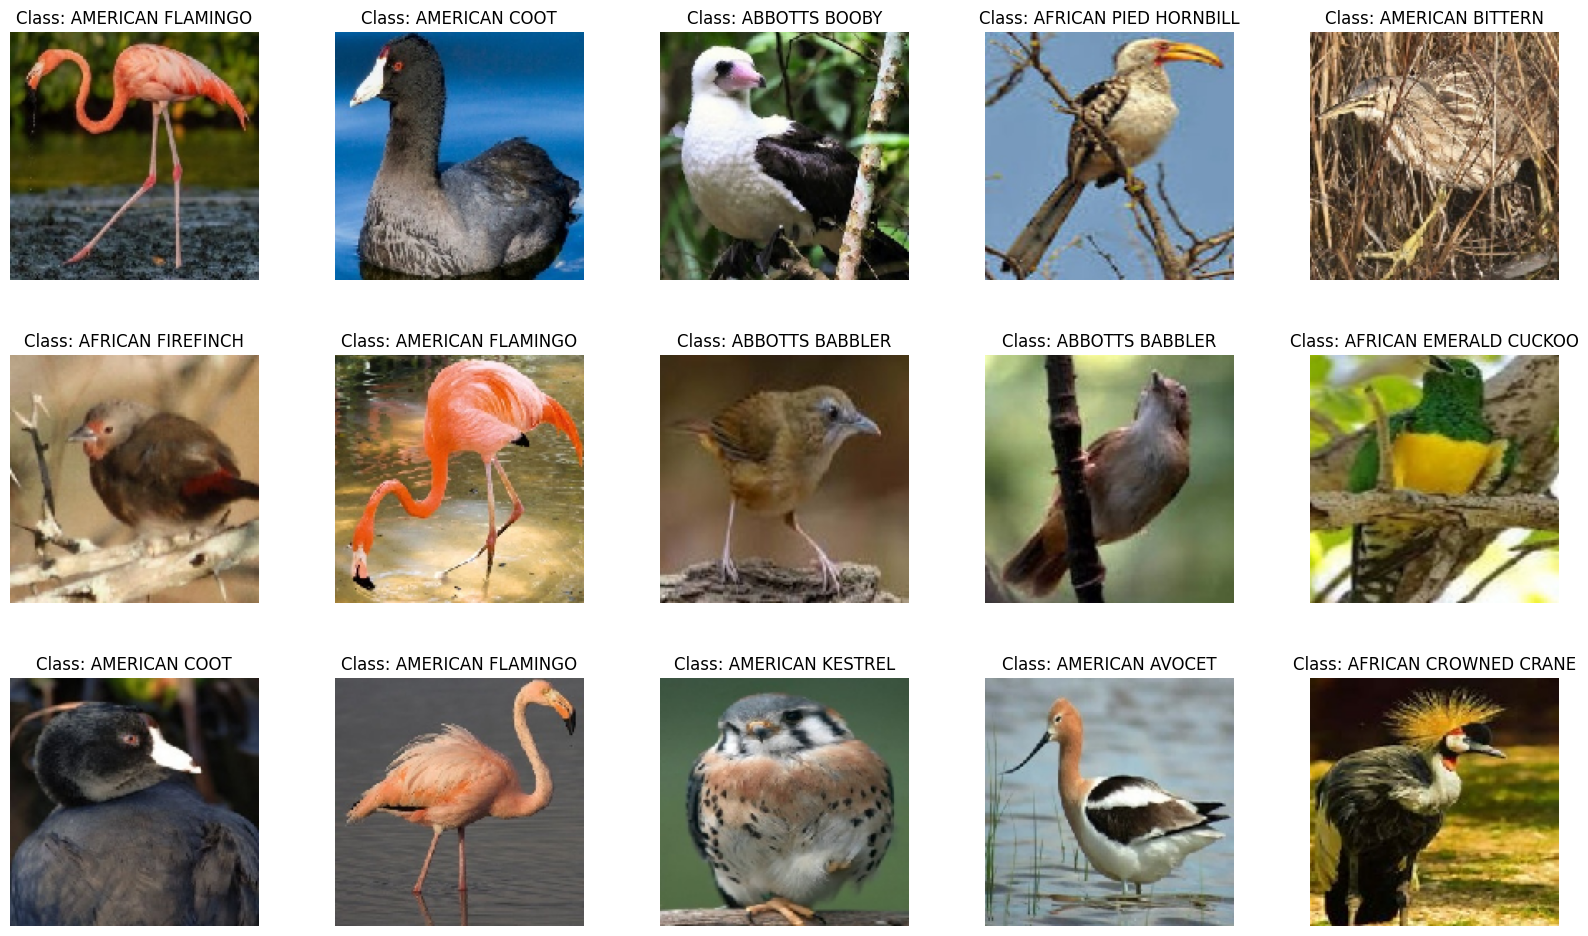

In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

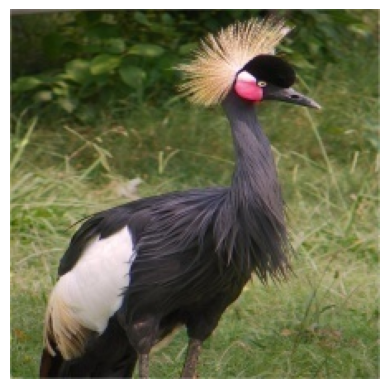

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/archive/images to predict/3.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the Sequential feedforward neural network model
seq_model = Sequential([
    Flatten(input_shape=(150,150,3), name='input_layer'),
    Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    Dense(20, activation='softmax', name='output_layer')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Print the model summary

seq_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)                │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,651,124 (33.00 MB)

 Trainable params: 8,651,124 (33.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 150, 150, 3)
(32, 20)


In [ ]:
history = seq_model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,

                   )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.0697 - loss: 3.0968 - val_accuracy: 0.1000 - val_loss: 2.9319
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - accuracy: 0.1456 - loss: 2.7661 - val_accuracy: 0.1400 - val_loss: 2.9174
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.1791 - loss: 2.6926 - val_accuracy: 0.1900 - val_loss: 2.7001
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.2319 - loss: 2.5654 - val_accuracy: 0.1800 - val_loss: 2.6495
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.2541 - loss: 2.5146 - val_accuracy: 0.2200 - val_loss: 2.6077


In [ ]:
n_categories = len(os.listdir('/content/drive/MyDrive/archive/train'))# number of categories
print(n_categories)

20


In [ ]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
0,0.100998,2.974617,0.10,2.931907
1,0.159913,2.754292,0.14,2.917399
2,0.191085,2.652747,0.19,2.700064
3,0.212594,2.572714,0.18,2.649467
4,0.254364,2.487263,0.22,2.607741


In [ ]:
results = pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.100998,2.974617,0.10,2.931907
1,0.159913,2.754292,0.14,2.917399
2,0.191085,2.652747,0.19,2.700064
3,0.212594,2.572714,0.18,2.649467
4,0.254364,2.487263,0.22,2.607741


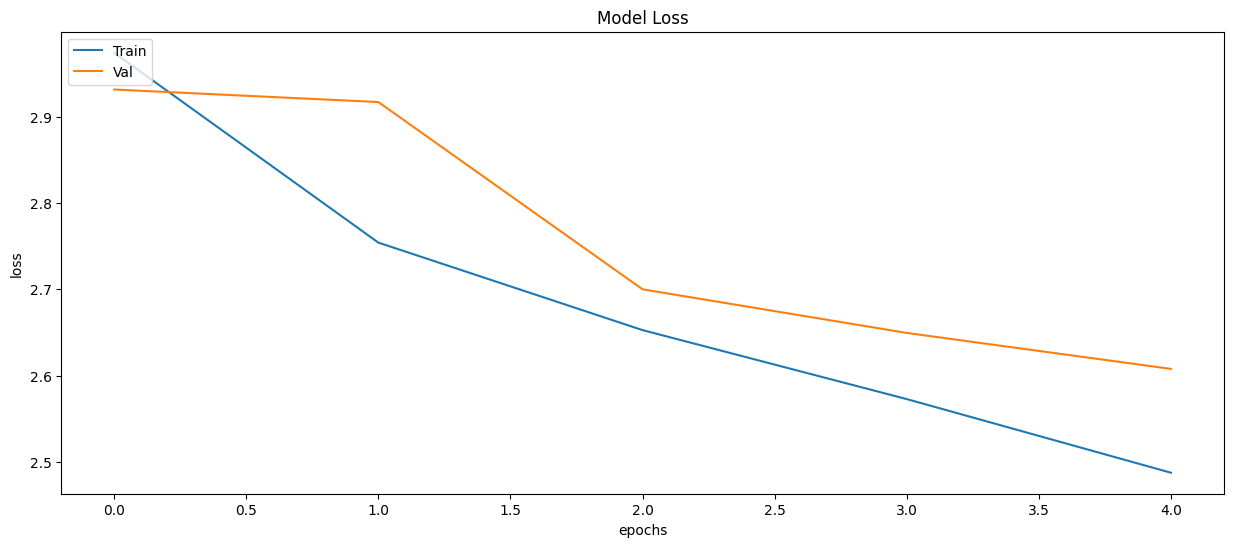

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

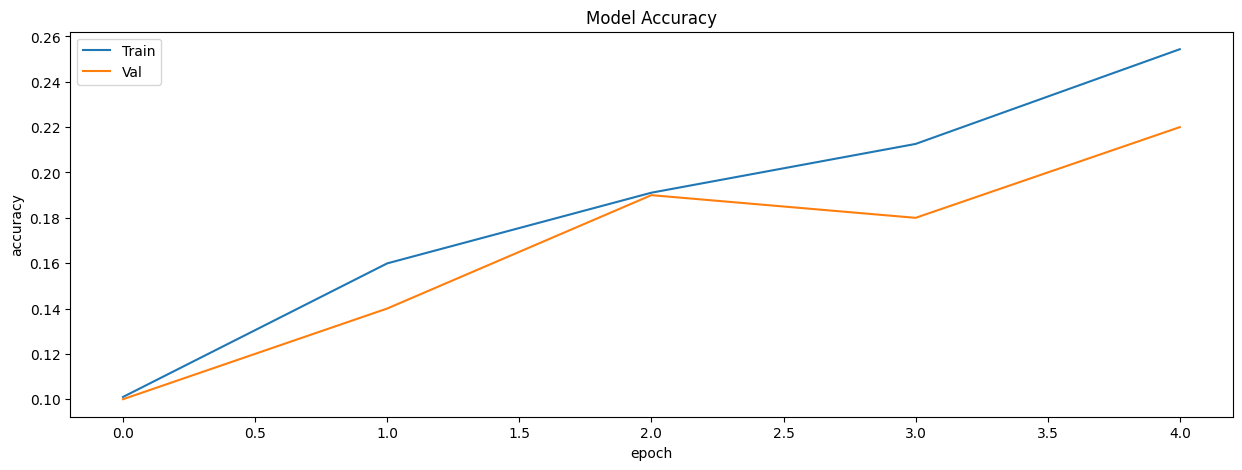

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
history = seq_model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,

                   )

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.2730 - loss: 2.3982 - val_accuracy: 0.2600 - val_loss: 2.4829
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.2935 - loss: 2.3130 - val_accuracy: 0.2800 - val_loss: 2.4315
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.3530 - loss: 2.1460 - val_accuracy: 0.3400 - val_loss: 2.2406
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.4060 - loss: 1.9862 - val_accuracy: 0.3100 - val_loss: 2.1963
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.4109 - loss: 1.9458 - val_accuracy: 0.3500 - val_loss: 2.1040
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.4343 - loss: 1.8266 - val_accuracy: 0.3600 - val_loss: 2.1210
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.4552 - loss: 1.7523 - val_accuracy: 0.3900 - val_loss: 2.0103
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.4874 - loss: 1

In [ ]:
results = pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.290835,2.339923,0.26,2.482868
1,0.307668,2.255093,0.28,2.431510
2,0.348504,2.141018,0.34,2.240614
3,0.386222,2.013636,0.31,2.196305
4,0.422070,1.897444,0.35,2.104026


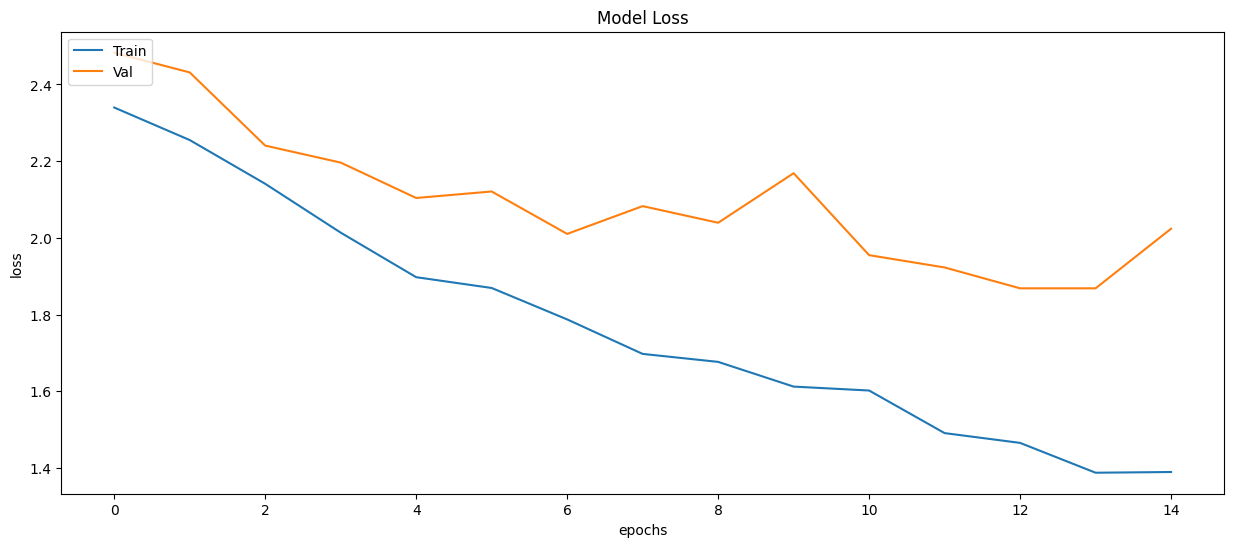

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

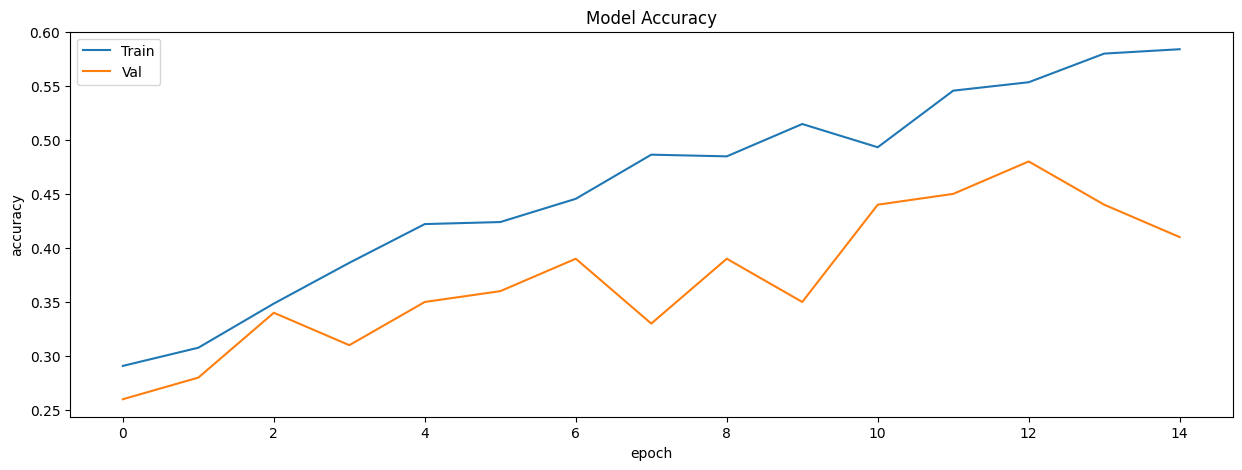

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
history = seq_model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,

                   )

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.6111 - loss: 1.3070 - val_accuracy: 0.4900 - val_loss: 1.8413
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.6131 - loss: 1.2975 - val_accuracy: 0.4900 - val_loss: 1.8435
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.6128 - loss: 1.2707 - val_accuracy: 0.5200 - val_loss: 1.8491
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6440 - loss: 1.2179 - val_accuracy: 0.5000 - val_loss: 1.7458
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.6528 - loss: 1.1777 - val_accuracy: 0.5100 - val_loss: 1.8991
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6320 - loss: 1.1619 - val_accuracy: 0.5000 - val_loss: 1.8390
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.6734 - loss: 1.1057 - val_accuracy: 0.4300 - val_loss: 1.9255
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.6752 - loss: 1

In [ ]:
results = pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.615960,1.290064,0.49,1.841257
1,0.613778,1.296517,0.49,1.843481
2,0.618142,1.259406,0.52,1.849068
3,0.623441,1.248806,0.50,1.745845
4,0.650249,1.182137,0.51,1.899093


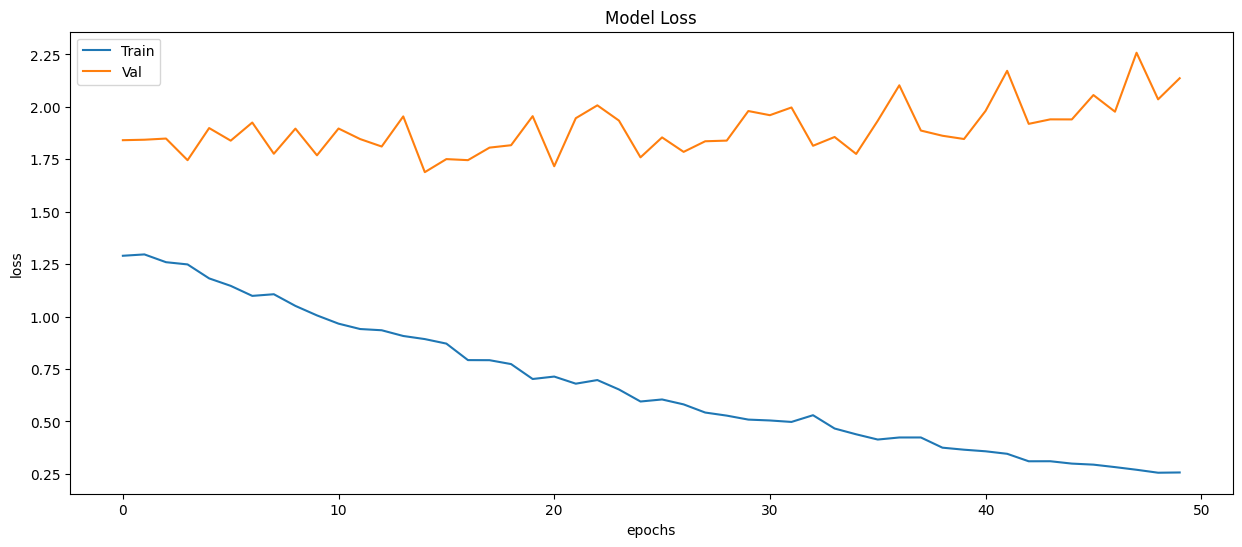

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

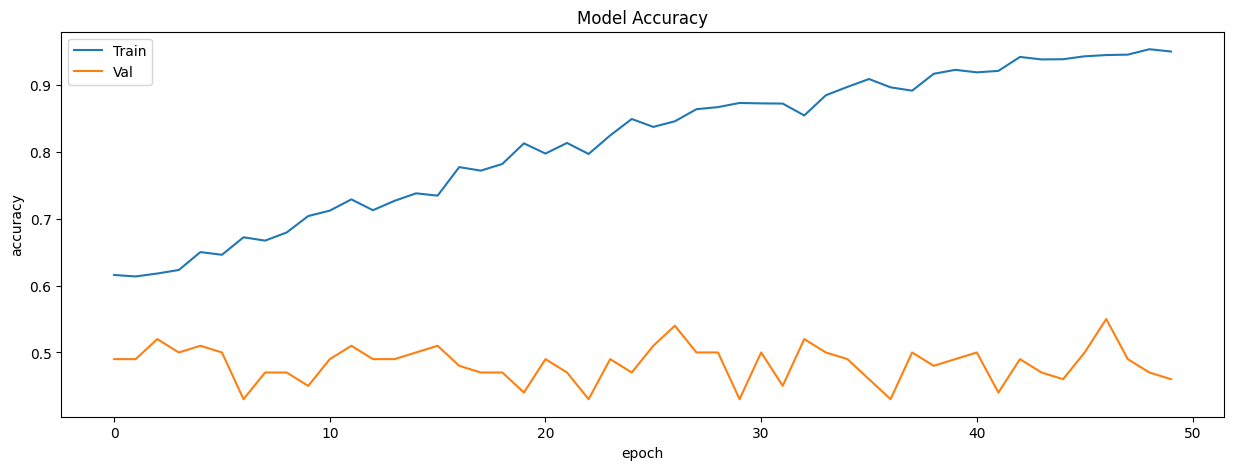

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [ ]:
results = seq_model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5224 - loss: 1.5647 


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.00      0.00      0.00         5
             ABBOTTS BOOBY       0.00      0.00      0.00         5
ABYSSINIAN GROUND HORNBILL       0.00      0.00      0.00         5
     AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
    AFRICAN EMERALD CUCKOO       0.17      0.20      0.18         5
         AFRICAN FIREFINCH       0.00      0.00      0.00         5
    AFRICAN OYSTER CATCHER       0.25      0.20      0.22         5
     AFRICAN PIED HORNBILL       0.00      0.00      0.00         5
       AFRICAN PYGMY GOOSE       0.00      0.00      0.00         5
                 ALBATROSS       0.00      0.00      0.00         5
            ALBERTS TOWHEE       0.08      0.20      0.12         5
      ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
             ALPINE CHOUGH       0.00      0.00      0.00         5
     ALTAMIRA YELLOWTHROAT       0.00      0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


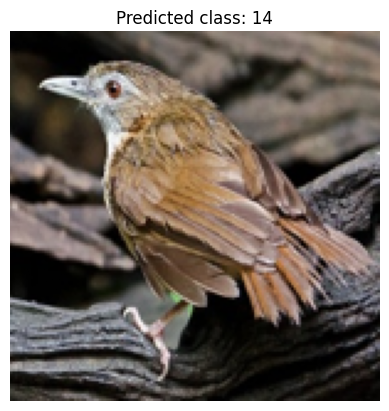

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/archive/test/ABBOTTS BABBLER'
img_size = 150

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : AMERICAN AVOCET
Class probability: 0.3889463
Predicted class for 2.jpg : AFRICAN PYGMY GOOSE
Class probability: 0.4859043
Predicted class for 3.jpg : AMERICAN KESTREL
Class probability: 0.37723377
Predicted class for 4.jpg : ABBOTTS BABBLER
Class probability: 0.98777604
Predicted class for 5.jpg : ABBOTTS BABBLER
Class probability: 0.6546941



# ResNet-50 Model Integration

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

input_shape = (150, 150, 3)

# Load ResNet-50 with pretrained weights, exclude top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the new model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the ResNet-50 base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet-50 model
history_resnet = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=50)

# Evaluate the model
resnet_eval = resnet_model.evaluate(validation_generator)
print(f"ResNet-50 Validation Loss: {resnet_eval[0]}, Validation Accuracy: {resnet_eval[1]}")



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.0524 - loss: 3.0341 - val_accuracy: 0.0500 - val_loss: 2.9926
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step - accuracy: 0.0733 - loss: 2.9632 - val_accuracy: 0.0900 - val_loss: 2.9568
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.0883 - loss: 2.9318 - val_accuracy: 0.1300 - val_loss: 2.9343
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.1286 - loss: 2.9041 - val_accuracy: 0.1000 - val_loss: 2.9041
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.1227 - loss: 2.8646 - val_accuracy: 0.1300 - val_loss: 2.8833
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.1622 - loss: 2.8147 - val_accuracy: 0.1700 - val_loss: 2.8327
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.1805 - loss: 2.7548 - val_accuracy: 0.1200 - val_loss: 2.8170
Epoch 8/50
101/101 ━━━━━━━━━━━━━

In [ ]:
# Compare with existing model
seq_model = seq_model.evaluate(validation_generator)
print(f"CNN Model Validation Loss: {seq_model[0]}, Validation Accuracy: {seq_model[1]}")

# Classification Report for ResNet-50
validation_generator.reset()
predictions_resnet = resnet_model.predict(validation_generator)
predicted_classes = predictions_resnet.argmax(axis=-1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
print("ResNet-50 Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4350 - loss: 2.2481 
CNN Model Validation Loss: 2.136770009994507, Validation Accuracy: 0.46000000834465027
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
ResNet-50 Classification Report:
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.00      0.00      0.00         5
             ABBOTTS BOOBY       0.00      0.00      0.00         5
ABYSSINIAN GROUND HORNBILL       0.00      0.00      0.00         5
     AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
    AFRICAN EMERALD CUCKOO       0.00      0.00      0.00         5
         AFRICAN FIREFINCH       0.00      0.00      0.00         5
    AFRICAN OYSTER CATCHER       0.00      0.00      0.00         5
     AFRICAN PIED HORNBILL       0.17      0.20      0.18         5
       AFRICAN PYGMY GOOSE       0.14      0.20      0.17         5
                 ALBATROSS       0.25      0.20      0.22         5
            ALBERTS TOWHEE       0.00      0.00      0.00         5
      ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
             ALPINE CHOUGH       0.20      0.2

In [ ]:
print(f"ResNet-50 Validation Loss: {resnet_eval[0]}, Validation Accuracy: {resnet_eval[1]}")


ResNet-50 Validation Loss: 2.1175014972686768, Validation Accuracy: 0.3400000035762787


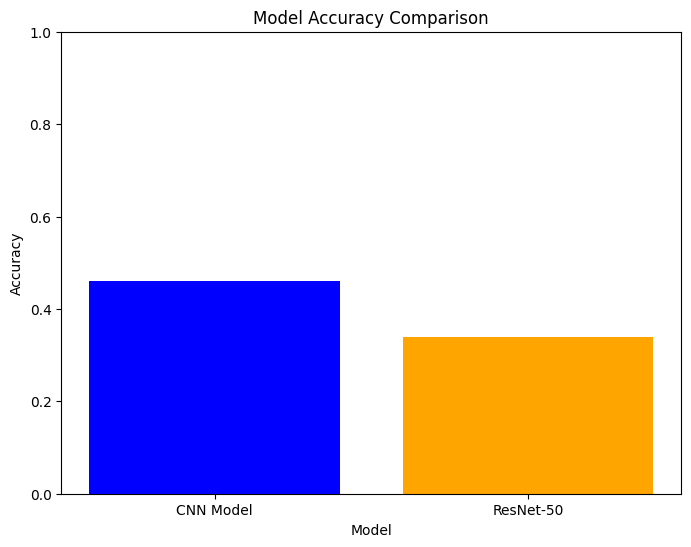

In [ ]:
# Plot accuracies of both models
import matplotlib.pyplot as plt

# Replace these values with the actual accuracy results from your evaluation
existing_model_accuracy = seq_model[1]  # Accuracy of CNN model
resnet_model_accuracy = resnet_eval[1]  # Accuracy of the ResNet-50 model

# Model names and their accuracies
accuracies = [existing_model_accuracy, resnet_model_accuracy]
model_names = ['CNN Model', 'ResNet-50']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

From the above plot, we can see CNN performs well for classifying bird species.

### Conclusion

In this project, we want to show the effectiveness of neural networks in classifying bird species from images. The results of the evaluation will give us an overview of the performance of the model and provide a basis for further optimization and refinement of the classification system.